## Importing all the necessary libraries

In [7]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

### Upload CSV File 

In [8]:
ProductionTank = pd.read_csv('ProductionTank1.csv')
# Dataset is now stored in a Pandas Dataframe

In [9]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Unit,Instruction_Step,Material_ID,Material_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration_Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


### Filter the ProductionTank df to show only 23MT02 production results

In [33]:
ProductionTank2302_df= ProductionTank.query('Unit == "%s"' % 2302)
print(ProductionTank2302_df) 

      Unnamed: 0  Material    BATCHID  Unit  \
1932        1932   1397022  107899894  2302   
1933        1933   1397022  107899894  2302   
1934        1934   1397022  107899894  2302   
1935        1935   1397022  107899894  2302   
1936        1936   1397022  107899894  2302   
...          ...       ...        ...   ...   
7984        7984   1775253  108084746  2302   
7985        7985   1775253  108084746  2302   
7986        7986   1775253  108084746  2302   
7987        7987   1775253  108084746  2302   
7988        7988   1775253  108084746  2302   

                                       Instruction_Step Material_ID  \
1932                               S3_BATCH_IN_PROGRESS         NaN   
1933                                         GUM_PROMPT         NaN   
1934  PROCEED WHEN SAMPLE IS DEAREATED AND DENSITY I...         NaN   
1935                                         STEP1_CONS     1002565   
1936                        PLEASE VERIFY BULK ADDITION         NaN   
...      

### Filter the ProductionTank2302_df by Material and Material_Name columns

NB: Looking at ingredients ( Material_Name ) addition in the material production in this tank 2501

In [35]:
# Group by the 'Material','Material_Name' column
#grouped = ProductionTank2302_df.groupby(['Material'])

#grouped.head()
# Apply aggregation functions to the grouped data
#mean_values = grouped.mean()
#sum_values = grouped['Quantity'].sum()
#count_values = grouped['Phase_duration'].count()

#print("Mean Values:")
#print(mean_values)

#print("\nSum Values:")
#print(sum_values)

#print("\nCount Values:")
#print(count_values)

### Investigation into the effect of gum on the batch production in this Tank 

In [36]:
#Select all the rows where GUM material is in the list below
Material_ID = ['1461896','1254972']
ProductionTank2302_dfGUM = ProductionTank2302_df[ProductionTank2302_df['Material_ID'].isin(Material_ID)]
ProductionTank2302_dfGUM=ProductionTank2302_dfGUM.drop(['Unnamed: 0', 'Instruction_Step', 'Material_Name','Phase_start', 'Phase_end'], axis=1)
# Or rename the existing DataFrame (rather than creating a copy)
ProductionTank2302_dfGUM.rename(columns={'Quantity': 'GUMQuantity','Phase_duration':'GUMPhase_duration','Phase_start_delay':'GUMPhase_start_delay','Flowrate_KGMIN':'GUMFlowrate_KGMIN','Phase_overrun':'GUMPhase_overrun'}, inplace=True)

#print(ProductionTank2302_dfGUM)

In [14]:
#Aggregate data per tank
aggregated_ProductionTank2302_dfGUM = ProductionTank2302_dfGUM.groupby(['BATCHID','Material_ID']).agg({
    'GUMPhase_duration': 'sum',
    'GUMPhase_overrun': 'sum',
    'GUMPhase_start_delay':'sum',
    'GUMQuantity':'sum',
    'GUMFlowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2302_dfGUM)

### Aggregation of data per tank : by Material

In [37]:
#Aggregate data per tank
aggregated_ProductionTank2302_df = ProductionTank2302_df.groupby(['Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2302_df)

### Aggregation of data per tank : by BATCHID

In [38]:
#Aggregate data per tank
aggregated_ProductionTank2302_df1 = ProductionTank2302_df.groupby(['BATCHID','Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2302_df1)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107553571   1648637             459      15.055556         211.250000   
1   107569832   1775253             633      22.875000         165.277778   
2   107569833   1775253              94       0.333333          14.166667   
3   107591051   1520984             187       0.333333           0.600000   
4   107593359   1428047             654      14.958333          55.461538   
5   107599384   1775253              89       0.333333           2.000000   
6   107609177   1520984             309       4.823529          40.000000   
7   107622258   1698522             359       2.222222         193.200000   
8   107641910   1428047             151      20.333333           2.166667   
9   107641913   1567195             617      17.473684         124.761905   
10  107650387   1775253             539      13.157895         228.476190   
11  107650388   1775253             266       0.000000           0.500000   

### Data Visualisation 

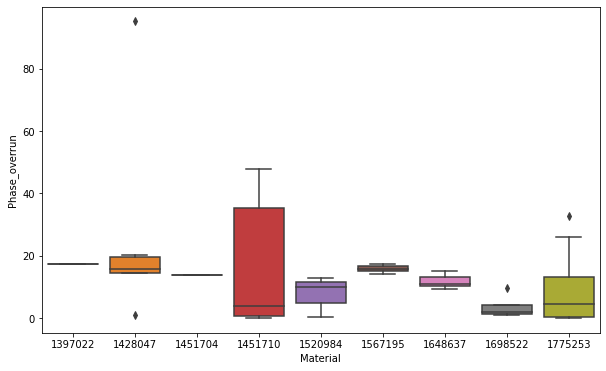

In [39]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2302_df1, x='Material', y='Phase_overrun')
plt.show()

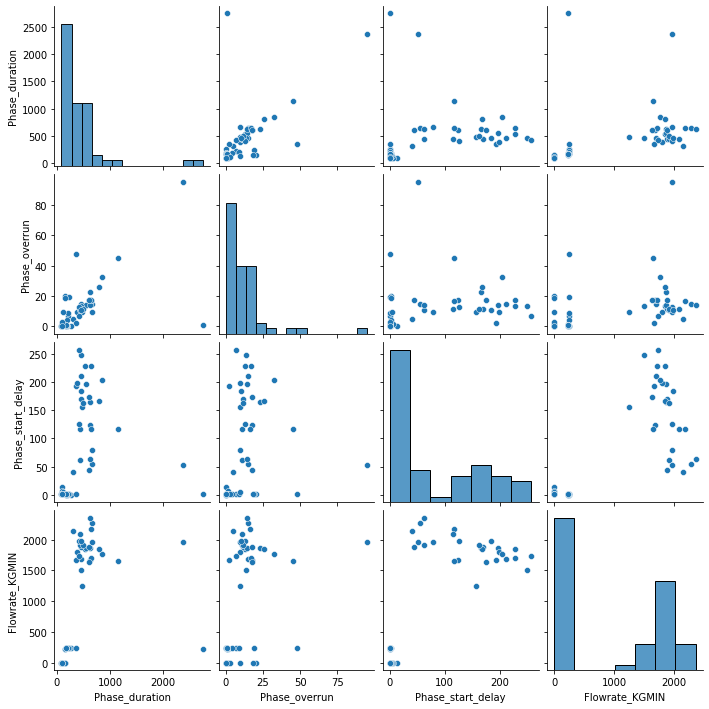

In [40]:
# Pair plot to visualize relationships between numeric variables
numeric_columns = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
sns.pairplot(aggregated_ProductionTank2302_df1[numeric_columns])
plt.show()

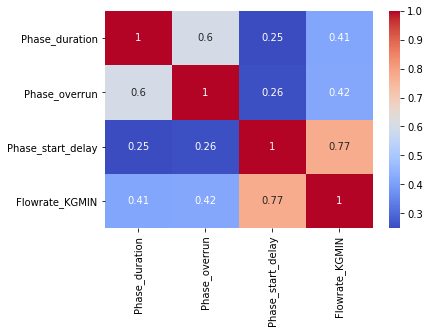

In [41]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = aggregated_ProductionTank2302_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [42]:
aggregated_ProductionTank2302_df1.info

<bound method DataFrame.info of       BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107553571   1648637             459      15.055556         211.250000   
1   107569832   1775253             633      22.875000         165.277778   
2   107569833   1775253              94       0.333333          14.166667   
3   107591051   1520984             187       0.333333           0.600000   
4   107593359   1428047             654      14.958333          55.461538   
5   107599384   1775253              89       0.333333           2.000000   
6   107609177   1520984             309       4.823529          40.000000   
7   107622258   1698522             359       2.222222         193.200000   
8   107641910   1428047             151      20.333333           2.166667   
9   107641913   1567195             617      17.473684         124.761905   
10  107650387   1775253             539      13.157895         228.476190   
11  107650388   1775253             266     

In [43]:
# Handling missing values
aggregated_ProductionTank2302_df1.dropna(inplace=True)  # Remove rows with missing values

In [44]:
# Handling duplicates
aggregated_ProductionTank2302_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [45]:
print(aggregated_ProductionTank2302_df1.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107553571   1648637             459      15.055556         211.250000   
1  107569832   1775253             633      22.875000         165.277778   
3  107591051   1520984             187       0.333333           0.600000   
4  107593359   1428047             654      14.958333          55.461538   
6  107609177   1520984             309       4.823529          40.000000   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0       1692.1422              10.250000       200.078233  
1       1868.9970              15.722222       262.675271  
3        234.9911              40.000000       237.850400  
4       2278.0298              12.115385       160.162771  
6       2144.7602              14.473684       240.752425  


In [46]:
# Define columns where you want to detect and remove outliers
ProductionTank2302_df2 = pd.DataFrame(aggregated_ProductionTank2302_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2302_df2 = remove_outliers_iqr(ProductionTank2302_df2, col)

# Display the cleaned DataFrame
print(ProductionTank2302_df2)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107553571   1648637             459      15.055556         211.250000   
1   107569832   1775253             633      22.875000         165.277778   
3   107591051   1520984             187       0.333333           0.600000   
6   107609177   1520984             309       4.823529          40.000000   
7   107622258   1698522             359       2.222222         193.200000   
9   107641913   1567195             617      17.473684         124.761905   
10  107650387   1775253             539      13.157895         228.476190   
11  107650388   1775253             266       0.000000           0.500000   
12  107659907   1775253             189       0.000000           0.400000   
13  107659908   1775253             169       0.000000           0.600000   
14  107659927   1520984             448      11.647059         170.473684   
15  107671476   1567195             546      14.157895         196.809524   

In [47]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2302_df2[numerical_cols] = scaler.fit_transform(ProductionTank2302_df2[numerical_cols])
print(ProductionTank2302_df2.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107553571   1648637        0.369347       0.708312           1.424430   
1  107569832   1775253        1.249392       1.669053           0.894892   
3  107591051   1520984       -1.006355      -1.100544          -1.001970   
6  107609177   1520984       -0.389312      -0.548853          -0.548136   
7  107622258   1698522       -0.136426      -0.868464           1.216518   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0        0.653182              10.250000       200.078233  
1        0.871918              15.722222       262.675271  
3       -1.149041              40.000000       237.850400  
6        1.212985              14.473684       240.752425  
7        0.618695              18.250000       168.117822  


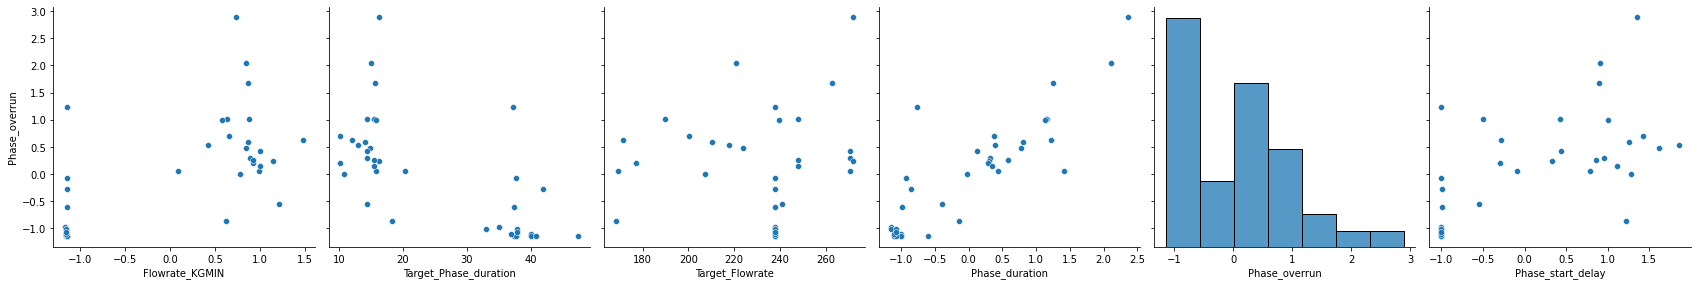

In [48]:
#Step 3: Visualization
#Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition. Also, plotting a heatmap for all the variables,

#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(ProductionTank2302_df2, x_vars=['Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_duration','Phase_overrun','Phase_start_delay'], y_vars = 'Phase_overrun', size = 4, kind = 'scatter' )
plt.show()

### Applying Machine Learning Algorithms 

In [ ]:
#pip install lightgbm

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(ProductionTank2302_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_feature_importance = gb_model.feature_importances_

# Support Vector Regressor
svr_model = SVR(C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

# Print results
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting',  'SVR', 'Neural Network']
mse_scores = [lr_mse, rf_mse, gb_mse, svr_mse, nn_mse]
r2_scores = [lr_r2, rf_r2, gb_r2, svr_r2, nn_r2]

for model, mse, r2 in zip(models, mse_scores, r2_scores):
    print(f"{model}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")

# Feature Importance
print("\nFeature Importance:")
for model, importance in zip(models[1:4], [rf_feature_importance, gb_feature_importance]):
    sorted_features = [x for _, x in sorted(zip(importance, X.columns), reverse=True)]
    print(f"{model}:\n  {sorted_features}\n")

Linear Regression:
  Mean Squared Error: 0.24
  R-squared: 0.41
Random Forest:
  Mean Squared Error: 0.39
  R-squared: 0.04
Gradient Boosting:
  Mean Squared Error: 0.55
  R-squared: -0.36
SVR:
  Mean Squared Error: 0.92
  R-squared: -1.28
Neural Network:
  Mean Squared Error: 11421133585.23
  R-squared: -28223743638.77

Feature Importance:
Random Forest:
  ['Phase_duration', 'Phase_start_delay', 'Target_Phase_duration', 'Flowrate_KGMIN', 'BATCHID', 'Target_Flowrate', 'Material']

Gradient Boosting:
  ['Phase_duration', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'BATCHID', 'Target_Flowrate', 'Material']



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(ProductionTank2302_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
gb_pred = best_gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)



# Support Vector Regressor
svr_model = SVR()
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error')
svr_grid_search.fit(X_train, y_train)
best_svr_model = svr_grid_search.best_estimator_
svr_pred = best_svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

# Neural Network
nn_model = MLPRegressor(random_state=42)
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [500, 1000, 1500]
}
nn_random_search = RandomizedSearchCV(nn_model, nn_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
nn_random_search.fit(X_train, y_train)
best_nn_model = nn_random_search.best_estimator_
nn_pred = best_nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

# Print results
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'Neural Network']
mse_scores = [lr_mse, rf_mse, gb_mse,  svr_mse, nn_mse]
r2_scores = [lr_r2, rf_r2, gb_r2,svr_r2, nn_r2]

for model, mse, r2 in zip(models, mse_scores, r2_scores):
    print(f"{model}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")